
### Importing the necessary libraries

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [2]:
from warnings import filterwarnings

In [3]:
filterwarnings('ignore')

### Loading the csv file:

In [4]:
mba_df = pd.read_csv(r"C:\Users\vaish_s4kcn30\Downloads\Python\My portfolio\MBA admissions\MBA dataset\MBA.csv")
mba_df.sample()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
5786,5787,Male,False,3.17,Humanities,White,660.0,5.0,Health Care,NaN


## Cleaning the data

### Dropping the unnecessary columns:

In [5]:
mba_df= mba_df.drop('application_id', axis = 1)
mba_df.sample()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
2844,Male,False,3.29,Business,Asian,670.0,5.0,Energy,NaN


In [6]:
mba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         6194 non-null   object 
 1   international  6194 non-null   bool   
 2   gpa            6194 non-null   float64
 3   major          6194 non-null   object 
 4   race           4352 non-null   object 
 5   gmat           6194 non-null   float64
 6   work_exp       6194 non-null   float64
 7   work_industry  6194 non-null   object 
 8   admission      1000 non-null   object 
dtypes: bool(1), float64(3), object(5)
memory usage: 393.3+ KB


In [7]:
mba_df.describe()

,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


### Identifying the unique values in every column:

In [8]:
mba_df.nunique()

gender             2
international      2
gpa              101
major              3
race               5
gmat              22
work_exp           9
work_industry     14
admission          2
dtype: int64

In [9]:
mba_df.shape

(6194, 9)

### Checking for null values:

In [10]:
null_values = mba_df.isnull().sum()
null_value_percent = (null_values/mba_df.shape[0])*100
null_value_percent

gender            0.000000
international     0.000000
gpa               0.000000
major             0.000000
race             29.738457
gmat              0.000000
work_exp          0.000000
work_industry     0.000000
admission        83.855344
dtype: float64

Since the null values for 'race' and 'admission' is pretty high, we will need to fill the null values using suitable methods.

### We will be using forward fill and backward fill method in order to fill the null values in the 'admission' column

In [11]:
mba_df['admission'].fillna(method = 'bfill', inplace = True)

In [12]:
mba_df['admission'].fillna(method = 'ffill', inplace = True)

In [13]:
mba_df['admission'].isnull().sum()

0

In [14]:
mba_df.admission.value_counts()

admission
Admit       5655
Waitlist     539
Name: count, dtype: int64

### We will be using forward fill method to fill the null values in the 'admission' column

In [15]:
mba_df['race'].fillna(method = 'ffill', inplace = True)

In [16]:
mba_df['race'].isnull().sum()

0

In [17]:
mba_df.race.value_counts()

race
White       2060
Asian       1667
Black       1287
Hispanic     849
Other        331
Name: count, dtype: int64

In [18]:
mba_df.isnull().sum()

gender           0
international    0
gpa              0
major            0
race             0
gmat             0
work_exp         0
work_industry    0
admission        0
dtype: int64

### Checking for duplicate values:

In [19]:
duplicates = mba_df.duplicated().sum()
print(f'The total number of duplicate values in the dataset is {duplicates}')

The total number of duplicate values in the dataset is 22


We will drop the duplicate values from the dataset.

In [20]:
mba_df = mba_df.drop_duplicates()

In [21]:
mba_df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,Admit
2,Female,True,3.30,Business,Black,710.0,5.0,Technology,Admit
3,Male,False,3.47,STEM,Black,690.0,6.0,Technology,Admit
4,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,Admit


### Exploratory Data Analysis

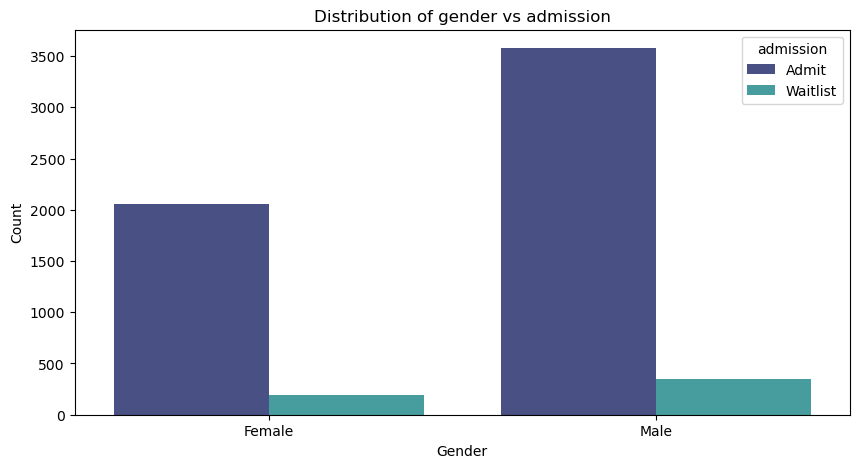

In [22]:
plt.figure(figsize = (10,5))
sns.countplot(data = mba_df,x = 'gender', hue = 'admission', palette = 'mako')
plt.title('Distribution of gender vs admission')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

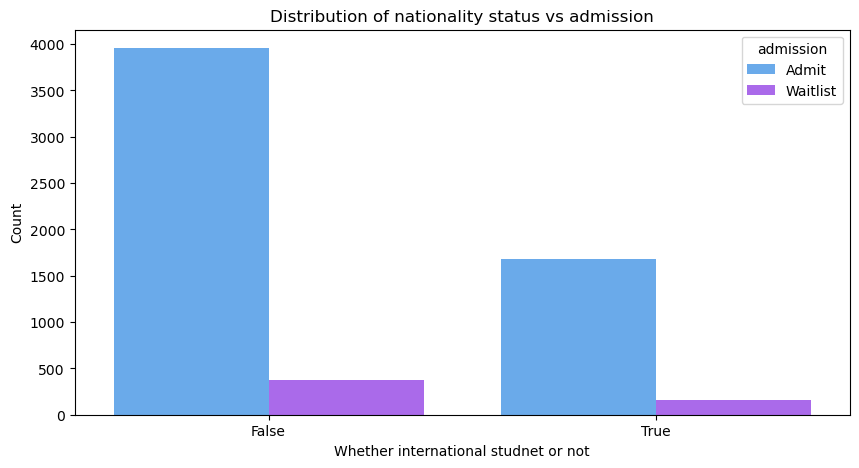

In [23]:
plt.figure(figsize = (10,5))
sns.countplot(data = mba_df,x = 'international', hue = 'admission', palette = 'cool')
plt.title('Distribution of nationality status vs admission')
plt.xlabel('Whether international studnet or not')
plt.ylabel('Count')
plt.show()

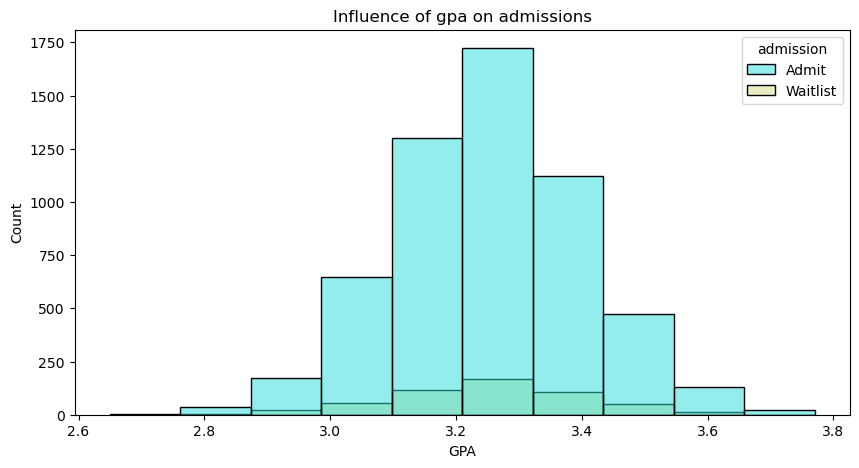

In [24]:
plt.figure(figsize = (10,5))
sns.histplot(data = mba_df,x = 'gpa', hue = 'admission', palette = 'rainbow', bins = 10)
plt.title('Influence of gpa on admissions')
plt.xlabel('GPA')
plt.ylabel('Count')
plt.show()

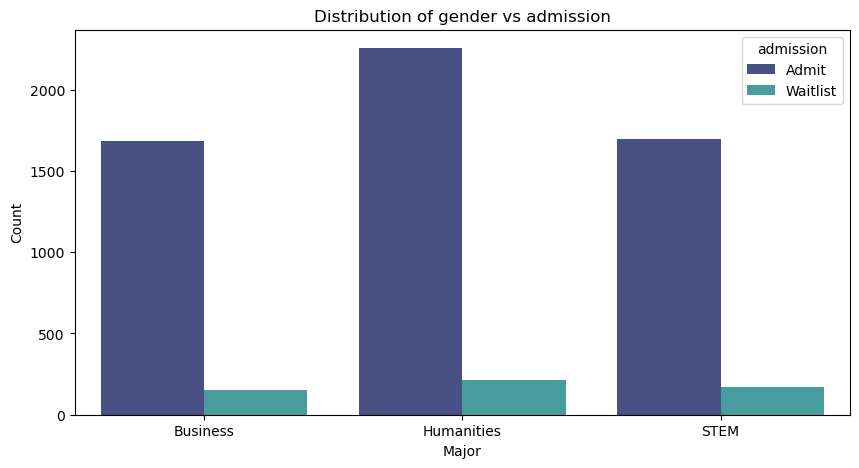

In [25]:
plt.figure(figsize = (10,5))
sns.countplot(data = mba_df,x = 'major', hue = 'admission', palette = 'mako')
plt.title('Distribution of gender vs admission')
plt.xlabel('Major')
plt.ylabel('Count')
plt.show()

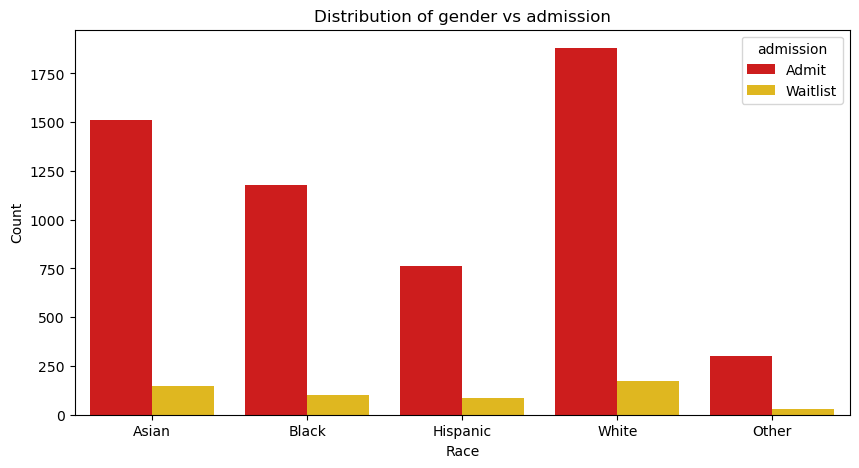

In [26]:
plt.figure(figsize = (10,5))
sns.countplot(data = mba_df,x = 'race', hue = 'admission', palette = 'hot')
plt.title('Distribution of gender vs admission')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

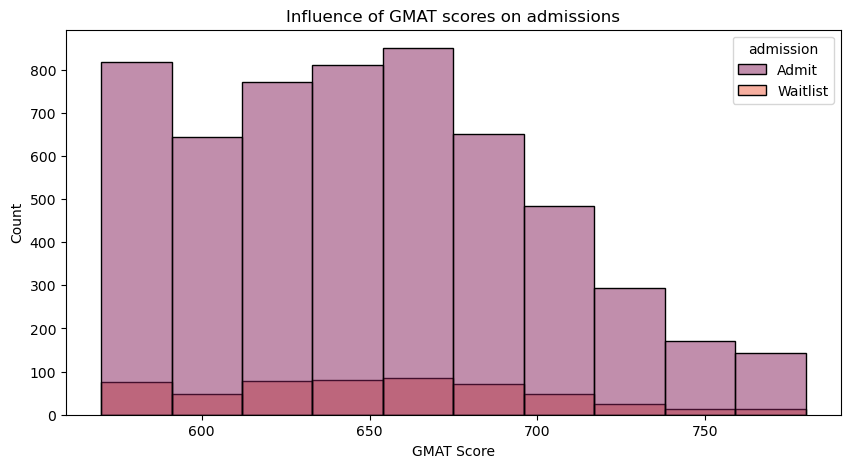

In [27]:
plt.figure(figsize = (10,5))
sns.histplot(data = mba_df,x = 'gmat', hue = 'admission', palette = 'rocket', bins = 10)
plt.title('Influence of GMAT scores on admissions')
plt.xlabel('GMAT Score')
plt.ylabel('Count')
plt.show()

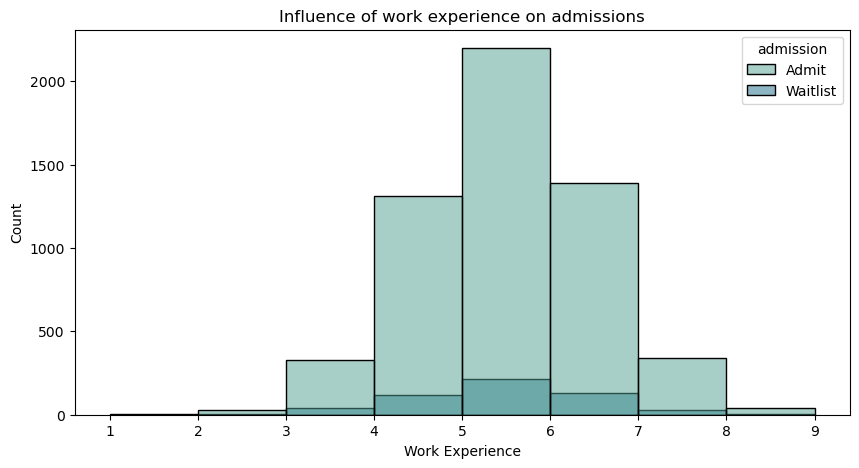

In [28]:
plt.figure(figsize = (10,5))
sns.histplot(data = mba_df,x = 'work_exp', hue = 'admission', palette = 'crest', bins = 8)
plt.title('Influence of work experience on admissions')
plt.xlabel('Work Experience')
plt.ylabel('Count')
plt.show()

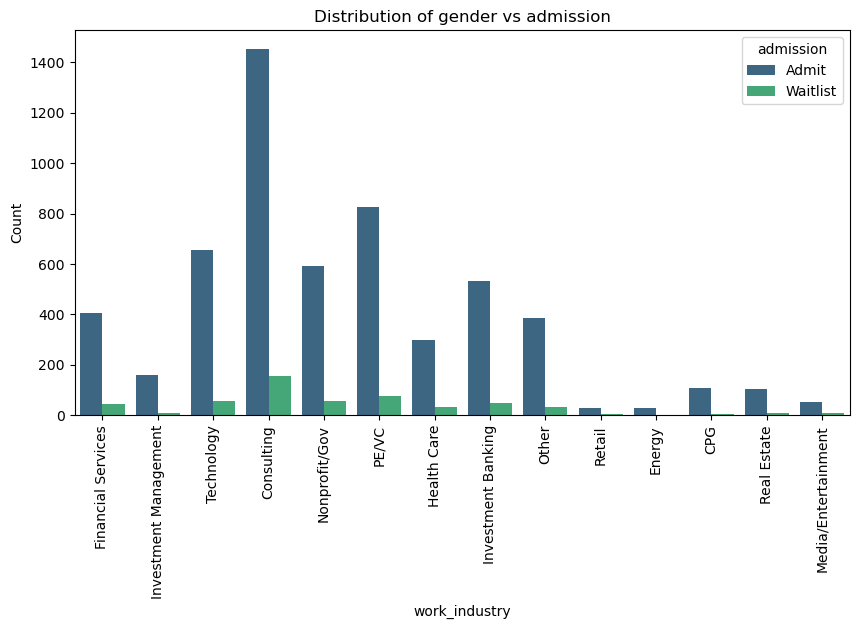

In [29]:
plt.figure(figsize = (10,5))
sns.countplot(data = mba_df,x = 'work_industry', hue = 'admission', palette = 'viridis')
plt.xticks(rotation = 90)
plt.title('Distribution of gender vs admission')
plt.ylabel('Count')
plt.show()

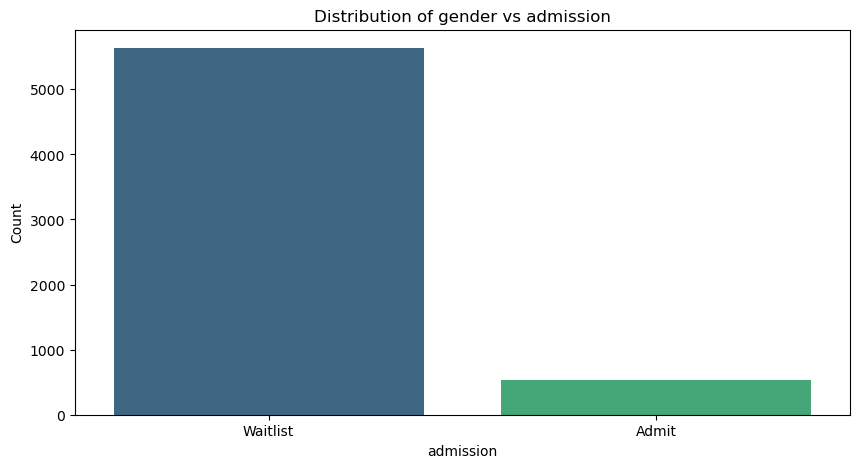

In [84]:
plt.figure(figsize = (10,5))
sns.countplot(data = mba_df,x = 'admission', palette = 'viridis')
plt.xticks(ticks = [0,1], labels = ['Waitlist','Admit'])
plt.title('Distribution of gender vs admission')
plt.ylabel('Count')
plt.show()

### Encoding the non numerical datatypes:

In [30]:
col = mba_df.select_dtypes(['object','bool']).columns
for i in col:
    mba_df[i] = mba_df[i].astype('category')
    mba_df[i] =  mba_df[i].cat.codes
    

In [31]:
mba_df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,0
1,1,0,3.28,1,1,680.0,5.0,6,0
2,0,1,3.30,0,1,710.0,5.0,13,0
3,1,0,3.47,2,1,690.0,6.0,13,0
4,1,0,3.35,2,2,590.0,5.0,1,0


### Splitting the dataset into feature and target columns:

In [32]:
X = mba_df.drop('admission', axis=1)
y= mba_df['admission']

In [33]:
X.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry
0,0,0,3.30,0,0,620.0,3.0,3
1,1,0,3.28,1,1,680.0,5.0,6
2,0,1,3.30,0,1,710.0,5.0,13
3,1,0,3.47,2,1,690.0,6.0,13
4,1,0,3.35,2,2,590.0,5.0,1


In [34]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: admission, dtype: int8

In [85]:
y.value_counts()

admission
0    5634
1     538
Name: count, dtype: int64

### Standardizing the dataset:

### In order to ensure that all the features contribute equally to the target label, we will standardize the dataset. 

In [35]:
scaler = StandardScaler()

In [36]:
X = scaler.fit_transform(X)

In [37]:
print(X)

[[-1.322581   -0.65172546  0.32488725 ... -0.63062928 -1.95174762
  -0.72924965]
 [ 0.75609736 -0.65172546  0.19298762 ...  0.58550692 -0.01568425
  -0.02055356]
 [-1.322581    1.53438842  0.32488725 ...  1.19357503 -0.01568425
   1.63307062]
 ...
 [-1.322581    1.53438842 -0.20271127 ...  0.58550692 -0.01568425
  -0.49301762]
 [ 0.75609736  1.53438842  0.72058614 ... -1.23869738 -0.01568425
   0.68814252]
 [ 0.75609736 -0.65172546 -0.13676145 ... -0.02256118 -0.98371593
  -1.2017137 ]]


In [38]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
6189    0
6190    0
6191    0
6192    0
6193    0
Name: admission, Length: 6172, dtype: int8


### Model Selection:

### We will split the data into a training and testing dataset. We will be using the training datatset to train the model. The testing dataset is used to evaluate the accuracy of the model prediction which will be calculated with certain accuracy meaurements. 

In [139]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, stratify=y ,random_state=42)

In [140]:
X_train.shape, y_train.shape

((4937, 8), (4937,))

In [141]:
X_test.shape,y_test.shape

((1235, 8), (1235,))

### Since this is a classification model, we will be employing various classification algorithms to identify the best fit. We will also be using accuracy metrics to check the model accuracy. 

### We will create a function for calculating all the accuracy metrics:

In [75]:
def accuracy_metrics(model_name, y_test, y_pred):
    print(f'The accuracy metrics for {model_name} are as follows \n')
    acc_score = np.round((roc_auc_score(y_test, y_pred)),2)
    print(f'ROC - AUC score: {acc_score}')
    class_report = classification_report(y_test,y_pred)
    print(f'\nClassification report: \n\n{class_report}')

    

### First, we will be using the simpliest algorithm used for classification, which is the logistic regression algorithm. 

### Logistic regression:

In [42]:
lr = LogisticRegression()

### Fitting the model:

In [160]:
lr_model = lr.fit(X_train,y_train)

### Predicting the target variable using the fitted model: 

In [161]:
y_pred = lr_model.predict(X_test)

In [144]:
conf_matrix_lr = confusion_matrix(y_test, y_pred)
conf_matrix_lr

array([[1127,    0],
       [ 108,    0]], dtype=int64)

### Plotting the confusion matrix to visualise the accuracy of the model prediction:

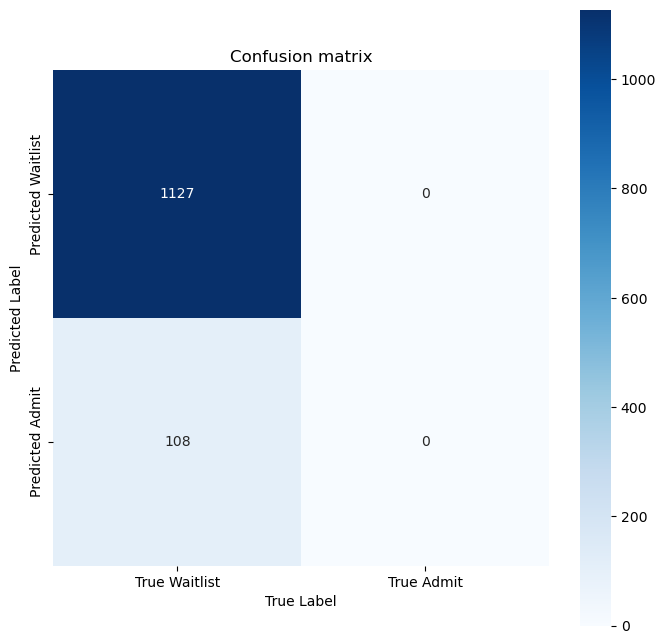

In [154]:
plt.figure(figsize = (8,8))
sns.heatmap(conf_matrix_lr,annot = True,fmt = 'd', square = True, cmap = 'Blues'
           ,xticklabels=['True Waitlist','True Admit'], yticklabels=['Predicted Waitlist','Predicted Admit'] )
plt.title('Confusion matrix')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()

### Calculating the accuracy metrics:

In [146]:
accuracy_metrics('Logistic Regression', y_test,y_pred)

The accuracy metrics for Logistic Regression are as follows 

ROC - AUC score: 0.5

Classification report: 

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1127
           1       0.00      0.00      0.00       108

    accuracy                           0.91      1235
   macro avg       0.46      0.50      0.48      1235
weighted avg       0.83      0.91      0.87      1235



### We will now use the Random Forest Classifier model to check if there is an improvement in the accuracy 

### Random Forest Classifier:

In [147]:
rfc = RandomForestClassifier()

### Fitting the model:

In [148]:
rfc_model = rfc.fit(X_train,y_train)

### Predicting the target variable to check model accuracy: 

In [149]:
y_pred_rfc = rfc_model.predict(X_test)

In [150]:
conf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)
conf_matrix

array([[1133,    3],
       [  98,    1]], dtype=int64)

### Plotting the confusion matrix to visualise the accuracy of the model prediction:

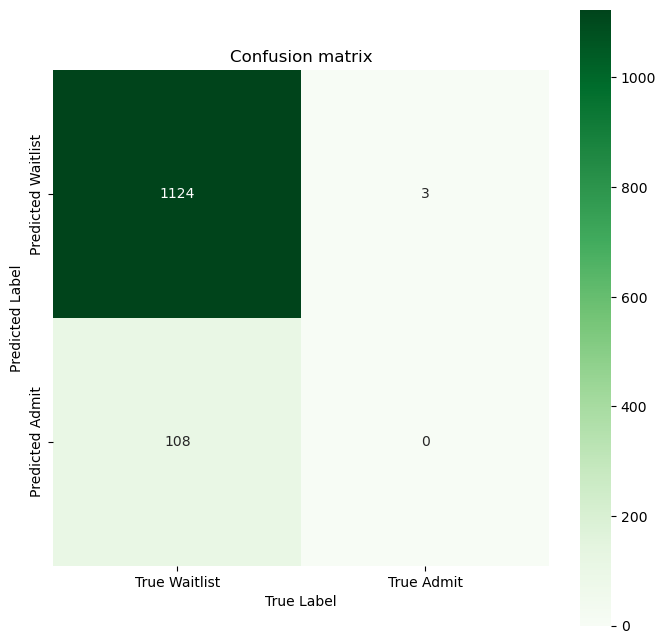

In [153]:
plt.figure(figsize = (8,8))
sns.heatmap(conf_matrix_rfc,annot = True, fmt = 'd', square = True, cmap = 'Greens'
           ,xticklabels=['True Waitlist','True Admit'], yticklabels=['Predicted Waitlist','Predicted Admit'] )
plt.title('Confusion matrix')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()

### Calculating the accuracy metrics:

In [152]:
accuracy_metrics('Random Forest Classifier', y_test, y_pred_rfc)

The accuracy metrics for Random Forest Classifier are as follows 

ROC - AUC score: 0.5

Classification report: 

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1127
           1       0.00      0.00      0.00       108

    accuracy                           0.91      1235
   macro avg       0.46      0.50      0.48      1235
weighted avg       0.83      0.91      0.87      1235



### We  will try Hyper Parameter Tuning in order to see if we can improve the accuracy of the model:

### Hyper Parameter tuning:

In [131]:
parameters = {'n_estimators':np.arange(100,1000,200),'criterion':['gini','entropy'],'max_depth': np.arange(10,100,10)}

In [132]:
gs = GridSearchCV(estimator = rfc, param_grid=parameters,n_jobs=10, cv = 5 )

In [133]:
gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=10,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
                         'n_estimators': array([100, 300, 500, 700, 900])})

In [134]:
best_parameters = gs.best_params_
best_parameters

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}

In [135]:
best_model = gs.best_estimator_

In [136]:
rfc_pt_model = best_model.fit(X_train,y_train)

In [137]:
y_pred_rfc_pt = rfc_pt_model.predict(X_test)

In [156]:
conf_matrix_rfc_pf = confusion_matrix(y_test,y_pred_rfc_pt)

In [157]:
conf_matrix_rfc_pf

array([[1127,    0],
       [ 108,    0]], dtype=int64)

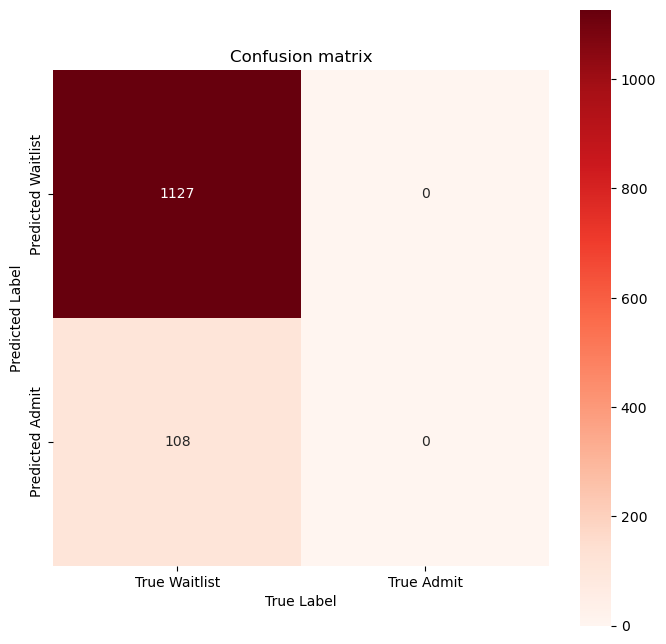

In [159]:
plt.figure(figsize = (8,8))
sns.heatmap(conf_matrix_rfc_pf,annot = True, fmt = 'd', square = True, cmap = 'Reds'
           ,xticklabels=['True Waitlist','True Admit'], yticklabels=['Predicted Waitlist','Predicted Admit'] )
plt.title('Confusion matrix')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()

In [155]:
accuracy_metrics('Random Forest Classifier - Hyperparameter tuning', y_test, y_pred_rfc_pt)

The accuracy metrics for Random Forest Classifier - Hyperparameter tuning are as follows 

ROC - AUC score: 0.5

Classification report: 

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1127
           1       0.00      0.00      0.00       108

    accuracy                           0.91      1235
   macro avg       0.46      0.50      0.48      1235
weighted avg       0.83      0.91      0.87      1235



### Upon checking, we can see that there is no major differences in the accuracy. Henceforth, in order to save time and computational costs, we will procees with the logistic regression model. 